In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts, tile_sources as gvts
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
gv.extension('matplotlib')
gv.output(fig='png', size=300)
import glob
import fiona
import os

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [24]:
fiona.listlayers(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg')

['new_geopackage',
 'eaggrt_level0.geojson',
 'eaggrt_level1.geojson',
 'eaggrt_level2.geojson',
 'eaggrt_level3.geojson',
 'eaggrt_level4.geojson',
 'eaggrt_level5.geojson',
 'h3_level0.geojson',
 'h3_level1.geojson',
 'h3_level2.geojson',
 'h3_level3.geojson',
 'ISEA3H_level1.geojson',
 'ISEA3H_level2.geojson',
 'ISEA3H_level3.geojson',
 'ISEA3H_level4.geojson',
 'ISEA3H_level5.geojson',
 'ISEA4D_level1.geojson',
 'ISEA4D_level2.geojson',
 'ISEA4D_level3.geojson',
 'ISEA4D_level4.geojson',
 'ISEA4D_level5.geojson',
 'ISEA4H_level1.geojson',
 'ISEA4H_level2.geojson',
 'ISEA4H_level3.geojson',
 'ISEA4H_level4.geojson',
 'ISEA4H_level5.geojson',
 'ISEA4T_level1.geojson',
 'ISEA4T_level2.geojson',
 'ISEA4T_level3.geojson',
 'ISEA4T_level4.geojson',
 'ISEA4T_level5.geojson',
 'ISEA7H_level1.geojson',
 'ISEA7H_level2.geojson',
 'ISEA7H_level3.geojson',
 'ISEA7H_level4.geojson',
 'rhealpix_level0.geojson',
 'rhealpix_level1.geojson',
 'rhealpix_level2.geojson',
 'rhealpix_level3.geojson',
 

In [6]:
def check_crossing(lon1: float, lon2: float, validate: bool = True):
    """
    Assuming a minimum travel distance between two provided longitude coordinates,
    checks if the 180th meridian (antimeridian) is crossed.
    """
    if validate and any(abs(x) > 180.0 for x in [lon1, lon2]):
        raise ValueError("longitudes must be in degrees [-180.0, 180.0]")   
    return abs(lon2 - lon1) > 180.0

def check_for_geom(geom):
    crossed = False
    p_init = geom.exterior.coords[0]

    for p in range(1, len(geom.exterior.coords)):
        px = geom.exterior.coords[p]
        # print(px)

        if check_crossing(p_init[0], px[0]):
            crossed = True
        p_init = px
    
    return crossed

# H3

In [16]:
l_1 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='h3_level0.geojson')
l_2 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='h3_level1.geojson')
l_3 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='h3_level2.geojson')

In [17]:
l_1['crossed'] = l_1['geometry'].apply(check_for_geom)
l_2['crossed'] = l_2['geometry'].apply(check_for_geom)
l_3['crossed'] = l_3['geometry'].apply(check_for_geom)

In [18]:
l_1 = l_1[l_1['crossed']==False]
l_2 = l_2[l_2['crossed']==False]
l_3 = l_3[l_3['crossed']==False]

In [21]:
l_1 = gv.Polygons(l_1).opts(alpha=1, facecolor='none', edgecolor='red')
l_2 = gv.Polygons(l_2).opts(alpha=1, facecolor='none', edgecolor='darkblue')
l_3 = gv.Polygons(l_3).opts(alpha=1, facecolor='none', edgecolor='green')
img = gf.ocean * gf.coastline * gf.land * l_3 * l_1 * l_2.opts(projection=ccrs.Orthographic(14, 10), global_extent=True).relabel(group ='test')

In [23]:
gv.save(img, r'd:\UTCloud\DGGS\results\pictures\aperture_and_tesselations\h3.png')

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]
   .Test.I      :Polygons   [Longitude,Latitude]
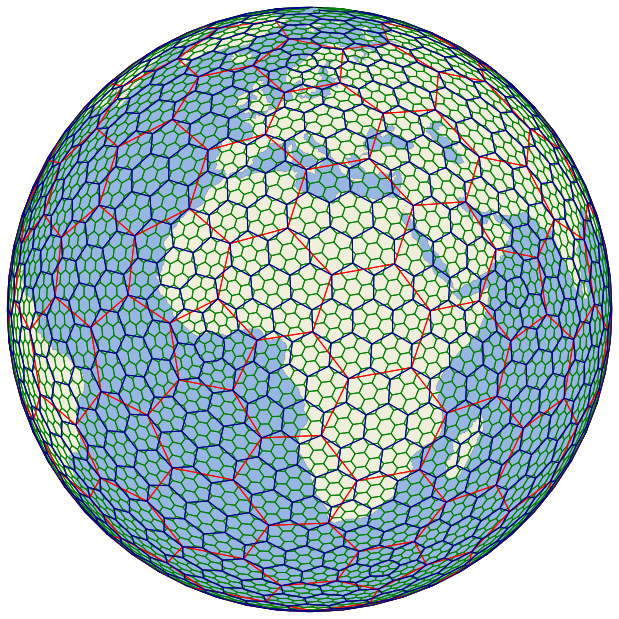

In [22]:
img

# s2

In [24]:
l_1 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='s2_level2.geojson')
l_2 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='s2_level3.geojson')
l_3 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='s2_level4.geojson')

In [25]:
l_1['crossed'] = l_1['geometry'].apply(check_for_geom)
l_2['crossed'] = l_2['geometry'].apply(check_for_geom)
l_3['crossed'] = l_3['geometry'].apply(check_for_geom)

In [26]:
l_1 = l_1[l_1['crossed']==False]
l_2 = l_2[l_2['crossed']==False]
l_3 = l_3[l_3['crossed']==False]

In [27]:
l_1 = gv.Polygons(s2_1).opts(alpha=1, facecolor='none', edgecolor='red')
l_2 = gv.Polygons(s2_2).opts(alpha=1, facecolor='none', edgecolor='darkblue')
l_3 = gv.Polygons(s2_3).opts(alpha=1, facecolor='none', edgecolor='green')
img = gf.ocean * gf.coastline * gf.land  * l_3 * l_2 * l_1.opts(projection=ccrs.Orthographic(14, 10), global_extent=True).relabel(group ='test')

In [28]:
gv.save(img, r'd:\UTCloud\DGGS\results\pictures\aperture_and_tesselations\s2.png')

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]
   .Test.I      :Polygons   [Longitude,Latitude]
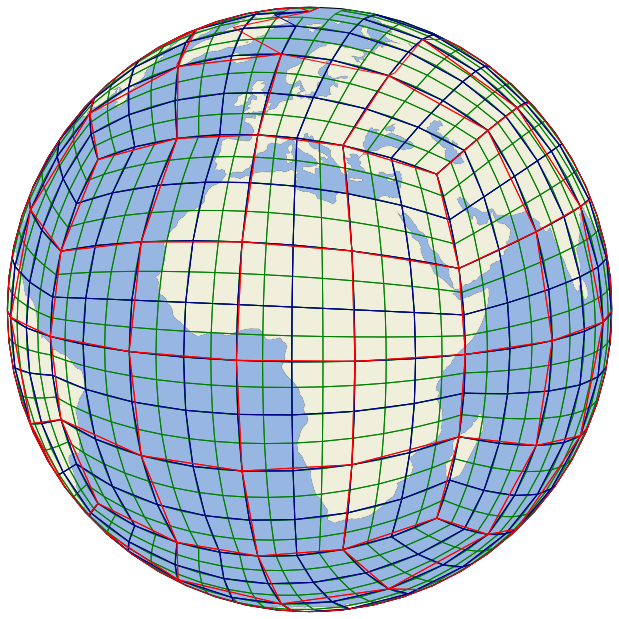

In [29]:
img

# rhpix

In [47]:
l_1 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='rhealpix_level1.geojson')
l_2 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='rhealpix_level2.geojson')
l_3 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='rhealpix_level3.geojson')

In [48]:
l_1['crossed'] = l_1['geometry'].apply(check_for_geom)
l_2['crossed'] = l_2['geometry'].apply(check_for_geom)
l_3['crossed'] = l_3['geometry'].apply(check_for_geom)

In [49]:
l_1 = l_1[l_1['crossed']==False]
l_2 = l_2[l_2['crossed']==False]
l_3 = l_3[l_3['crossed']==False]

In [50]:
l_1 = gv.Polygons(l_1).opts(alpha=0.8, facecolor='none', edgecolor='red')
l_2 = gv.Polygons(l_2).opts(alpha=0.8, facecolor='none', edgecolor='darkblue')
l_3 = gv.Polygons(l_3).opts(alpha=0.8, facecolor='none', edgecolor='green')
img = gf.ocean * gf.coastline * gf.land  * l_3 * l_2 * l_1.opts(projection=ccrs.Orthographic(14, 10), global_extent=True).relabel(group ='test')

In [51]:
gv.save(img, r'd:\UTCloud\DGGS\results\pictures\aperture_and_tesselations\rhpix.png')

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]
   .Test.I      :Polygons   [Longitude,Latitude]
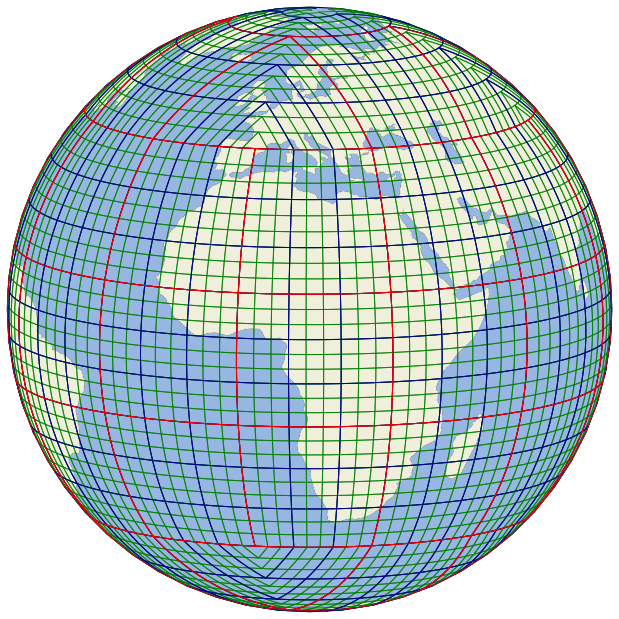

In [35]:
img

# ISEA3H

In [52]:
l_1 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA3H_level2.geojson')
l_2 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA3H_level3.geojson')
l_3 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA3H_level4.geojson')

In [53]:
l_1['crossed'] = l_1['geometry'].apply(check_for_geom)
l_2['crossed'] = l_2['geometry'].apply(check_for_geom)
l_3['crossed'] = l_3['geometry'].apply(check_for_geom)

In [54]:
l_1 = l_1[l_1['crossed']==False]
l_2 = l_2[l_2['crossed']==False]
l_3 = l_3[l_3['crossed']==False]

In [55]:
l_1 = gv.Polygons(l_1).opts(alpha=0.8, facecolor='none', edgecolor='red')
l_2 = gv.Polygons(l_2).opts(alpha=0.8, facecolor='none', edgecolor='darkblue')
l_3 = gv.Polygons(l_3).opts(alpha=0.8, facecolor='none', edgecolor='green')
img = gf.ocean * gf.coastline * gf.land  * l_3 * l_2 * l_1.opts(projection=ccrs.Orthographic(14, 10), global_extent=True).relabel(group ='test')

In [56]:
gv.save(img, r'd:\UTCloud\DGGS\results\pictures\aperture_and_tesselations\isea3h.png')

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]
   .Test.I      :Polygons   [Longitude,Latitude]
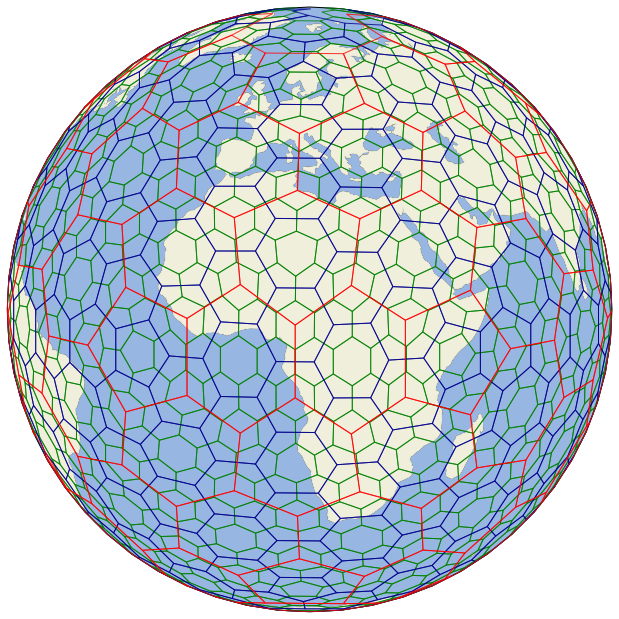

In [45]:
img

# ISEA4H

In [57]:
l_1 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4H_level2.geojson')
l_2 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4H_level3.geojson')
l_3 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4H_level4.geojson')

In [58]:
l_1['crossed'] = l_1['geometry'].apply(check_for_geom)
l_2['crossed'] = l_2['geometry'].apply(check_for_geom)
l_3['crossed'] = l_3['geometry'].apply(check_for_geom)

In [59]:
l_1 = l_1[l_1['crossed']==False]
l_2 = l_2[l_2['crossed']==False]
l_3 = l_3[l_3['crossed']==False]

In [60]:
l_1 = gv.Polygons(l_1).opts(alpha=0.8, facecolor='none', edgecolor='red')
l_2 = gv.Polygons(l_2).opts(alpha=0.8, facecolor='none', edgecolor='darkblue')
l_3 = gv.Polygons(l_3).opts(alpha=0.8, facecolor='none', edgecolor='green')
img = gf.ocean * gf.coastline * gf.land  * l_3 * l_2 * l_1.opts(projection=ccrs.Orthographic(14, 10), global_extent=True).relabel(group ='test')

In [62]:
gv.save(img, r'd:\UTCloud\DGGS\results\pictures\aperture_and_tesselations\isea4h.png')

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]
   .Test.I      :Polygons   [Longitude,Latitude]
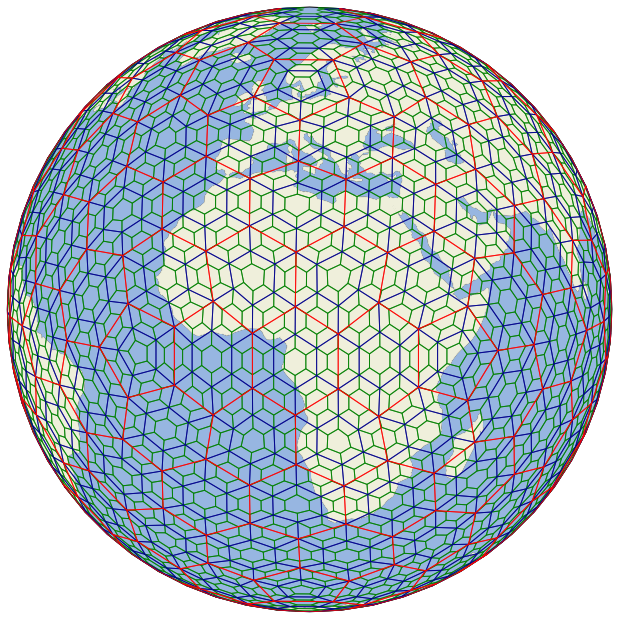

In [61]:
img

# ISEA4D

In [63]:
l_1 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4D_level2.geojson')
l_2 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4D_level3.geojson')
l_3 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4D_level4.geojson')

In [65]:
l_1['crossed'] = l_1['geometry'].apply(check_for_geom)
l_2['crossed'] = l_2['geometry'].apply(check_for_geom)
l_3['crossed'] = l_3['geometry'].apply(check_for_geom)

In [66]:
l_1 = l_1[l_1['crossed']==False]
l_2 = l_2[l_2['crossed']==False]
l_3 = l_3[l_3['crossed']==False]

In [67]:
l_1 = gv.Polygons(l_1).opts(alpha=0.8, facecolor='none', edgecolor='red')
l_2 = gv.Polygons(l_2).opts(alpha=0.8, facecolor='none', edgecolor='darkblue')
l_3 = gv.Polygons(l_3).opts(alpha=0.8, facecolor='none', edgecolor='green')
img = gf.ocean * gf.coastline * gf.land  * l_3 * l_2 * l_1.opts(projection=ccrs.Orthographic(14, 10), global_extent=True).relabel(group ='test')

In [69]:
gv.save(img, r'd:\UTCloud\DGGS\results\pictures\aperture_and_tesselations\isea4D.png')

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]
   .Test.I      :Polygons   [Longitude,Latitude]
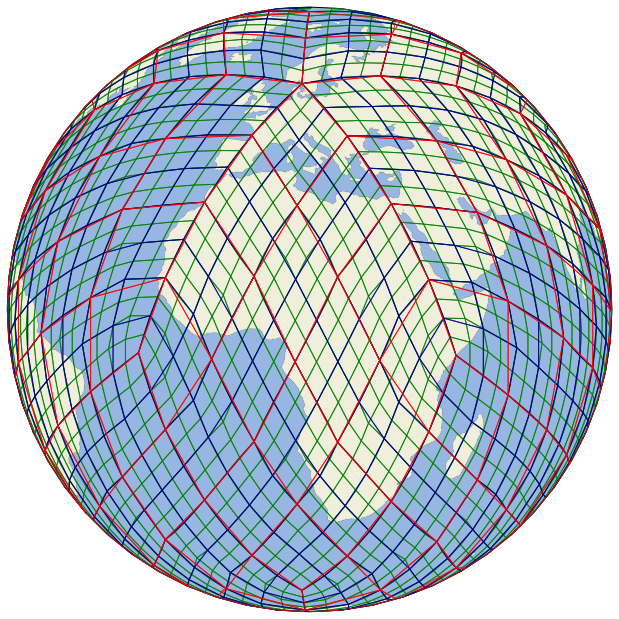

In [68]:
img

# ISEA4T

In [70]:
l_1 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4T_level2.geojson')
l_2 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4T_level3.geojson')
l_3 = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids_global_multires.gpkg',layer='ISEA4T_level4.geojson')

In [71]:
l_1['crossed'] = l_1['geometry'].apply(check_for_geom)
l_2['crossed'] = l_2['geometry'].apply(check_for_geom)
l_3['crossed'] = l_3['geometry'].apply(check_for_geom)

In [72]:
l_1 = l_1[l_1['crossed']==False]
l_2 = l_2[l_2['crossed']==False]
l_3 = l_3[l_3['crossed']==False]

In [73]:
l_1 = gv.Polygons(l_1).opts(alpha=0.8, facecolor='none', edgecolor='red')
l_2 = gv.Polygons(l_2).opts(alpha=0.8, facecolor='none', edgecolor='darkblue')
l_3 = gv.Polygons(l_3).opts(alpha=0.8, facecolor='none', edgecolor='green')
img = gf.ocean * gf.coastline * gf.land  * l_3 * l_2 * l_1.opts(projection=ccrs.Orthographic(14, 10), global_extent=True).relabel(group ='test')

In [75]:
gv.save(img, r'd:\UTCloud\DGGS\results\pictures\aperture_and_tesselations\isea4T.png')

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]
   .Test.I      :Polygons   [Longitude,Latitude]
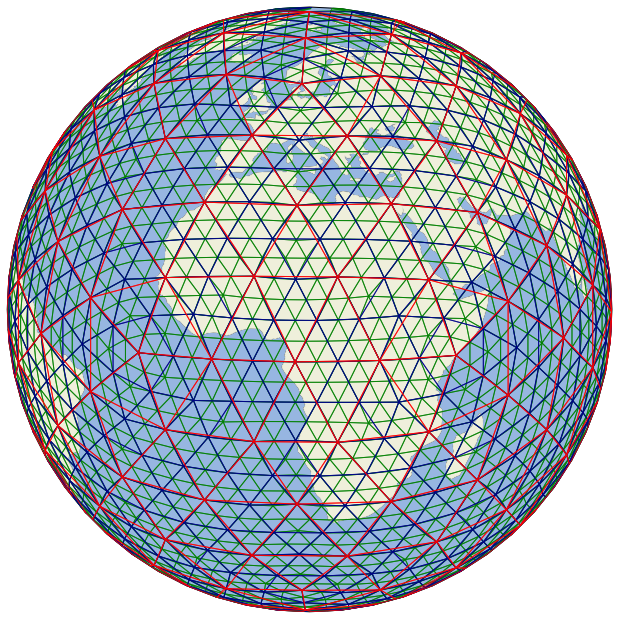

In [74]:
img